# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

## Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 


### Task-1 Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
df=pd.read_csv("exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [150]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [152]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [154]:
# Converting the 'date' column to datetime format.
df['date']=pd.to_datetime(df['date'],dayfirst=True)

In [156]:
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [158]:
# # Set 'date' as the index.
df.set_index('date',inplace=True)

In [160]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


In [162]:
df.isnull().sum()

Ex_rate    0
dtype: int64

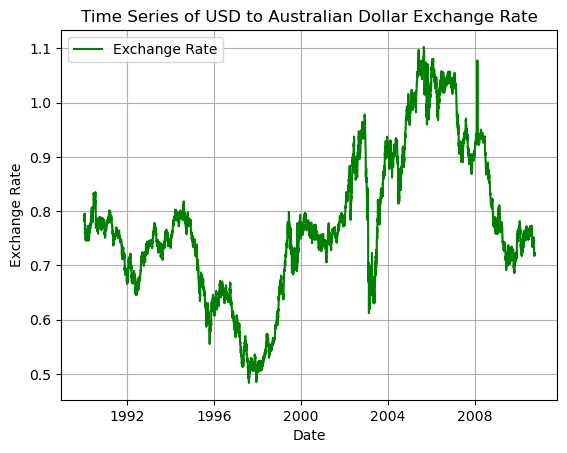

In [164]:
# Plotting the time series.
plt.plot(df.index,df['Ex_rate'],label='Exchange Rate',color='green')
plt.title('Time Series of USD to Australian Dollar Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [168]:
df.isnull().sum()
df.fillna(method='ffill',inplace=True)

C:\Users\khale\AppData\Local\Temp\ipykernel_18288\1665017606.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


### Task-2 Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


In [173]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

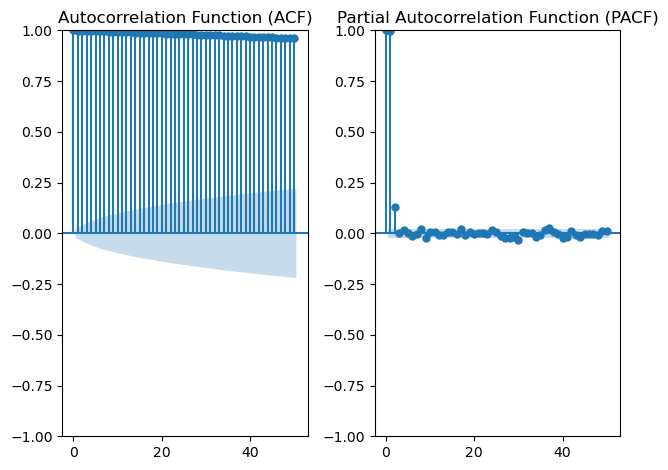

In [175]:
# Plotting ACF and PACF for the exchange rate.
plt.subplot(1,2,1)
plot_acf(df['Ex_rate'],lags=50,ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.subplot(1,2,2)
plot_pacf(df['Ex_rate'],lags=50,ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [177]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [179]:
# Fit the ARIMA model.
model=ARIMA(df['Ex_rate'],order=(1,1,1))
arima_fit=model.fit()

C:\Users\khale\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\khale\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\khale\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [197]:
# Forecast using ARIMA.
forecast=arima_fit.predict(start=len(df),end=len(df)+29)

In [181]:
# Model summary.
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 25 Nov 2024   AIC                         -56102.322
Time:                        10:08:34   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

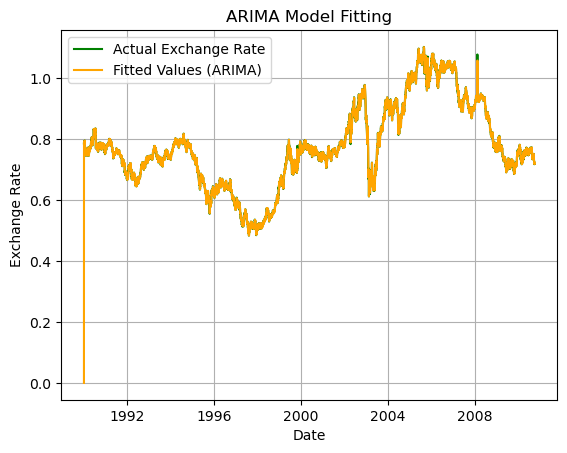

In [183]:
# Plotting the fitted values against the actual time series.
plt.plot(df['Ex_rate'],label='Actual Exchange Rate',color='green')
plt.plot(arima_fit.fittedvalues,label='Fitted Values (ARIMA)',color='orange')
plt.title('ARIMA Model Fitting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

### Task-3 Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.


In [186]:
# Fit an Exponential Smoothing model.
expsmooth_model=ExponentialSmoothing(df['Ex_rate'],trend='add')
exp_smoothing_result=model.fit()

C:\Users\khale\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [188]:
# Forecast using Exponential Smoothing.
exp_forecast=exp_smoothing_result.forecast(steps=30)

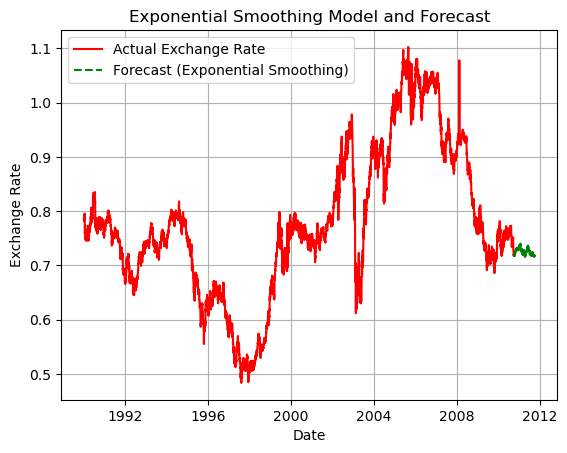

In [190]:
# Plotting the actual data and the forecast.
plt.plot(df.index,df['Ex_rate'],label='Actual Exchange Rate',color='red')
plt.plot(forecast.index,forecast,label='Forecast (Exponential Smoothing)',color='green',linestyle='--')
plt.title('Exponential Smoothing Model and Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

### Task-4 Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [195]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [199]:
# Compute error metrics for ARIMA.
mae_arima=mean_absolute_error(df['Ex_rate'][-30:],forecast)
rmse_arima=np.sqrt(mean_squared_error(df['Ex_rate'][-30:],forecast))

In [201]:
# Compute error metrics for Exponential Smoothing.
mae_exp=mean_absolute_error(df['Ex_rate'][-30:],exp_forecast)
rmse_exp=np.sqrt(mean_squared_error(df['Ex_rate'][-30:],exp_forecast))

In [203]:
print(f'ARIMA-MAE:{mae_arima},RMSE:{rmse_arima}')
print(f'Exponential Smoothing-MAE:{mae_exp},RMSE:{rmse_exp}')

ARIMA-MAE:0.012724006489305202,RMSE:0.016982710912755217
Exponential Smoothing-MAE:0.012724006489305202,RMSE:0.016982710912755217


### Grid search ARIMA parameters.

In [206]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [208]:
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE.
def evaluate_arima_model(X,arima_order):
    X=X.astype('float32')
    train_size=int(len(X)*0.50)
    train,test=X[0:train_size],X[train_size:]
    history=[x for x in train]
    predictions=list()            # Make predictions.
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit(disp=0)
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse=sqrt(mean_squared_error(test,predictions))  # Calculate out of sample error.
    return rmse

In [210]:
# Evaluate combinations of p, d and q values for an ARIMA model.
def evaluate_models(dataset,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=evaluate_arima_model(train, order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))

In [214]:
# Evaluate parameters.
p_values=range(0,5)
d_values=range(0,5)
q_values=range(0,5)
warnings.filterwarnings("ignore")
evaluate_models(df.values,p_values,d_values,q_values)

Best ARIMANone RMSE=inf


In [216]:
X=df.values
X=X.astype('float32')

In [222]:
X

array([[0.7855  ],
       [0.7818  ],
       [0.7867  ],
       ...,
       [0.723197],
       [0.720825],
       [0.720825]], dtype=float32)

In [224]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

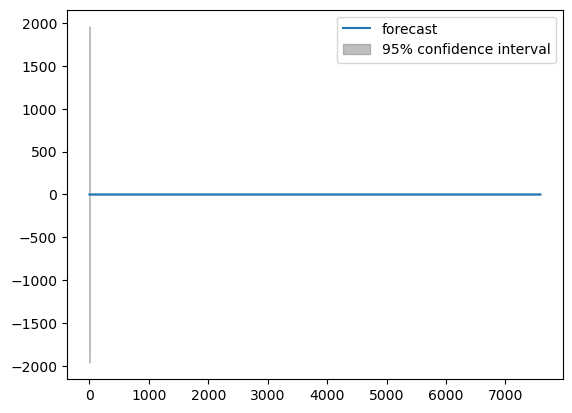

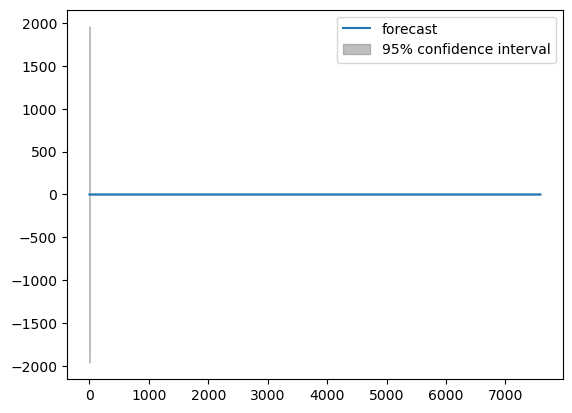

In [226]:
model=ARIMA(X,order=(3,1,0))
model_fit=model.fit()
forecast=model_fit.forecast(steps=10)[0]
plot_predict(model_fit)